<a href="https://colab.research.google.com/github/jessiechd/AstroML/blob/main/sdss17_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object classification with CNN


*   uses photometric features in dataset (`u, g, r, i, z`) to classify object as star, galaxy, or quasar (`class`)
*   turned numerical data into visual representation for CNN-based classification
* integrated more features (`redshift, alpha, delta`) for an improved model


dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [ ]:
!pip install tensorflow scikit-learn pandas --q

In [ ]:
import pandas as pd

# load dataset
df = pd.read_csv("/content/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# get required feature & target columns
features = ["u", "g", "r", "i", "z"]
target = "class"
X = df[features].values
y = df[target].values

# encode target labels & feature normalization
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape input to fit CNN input shape (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

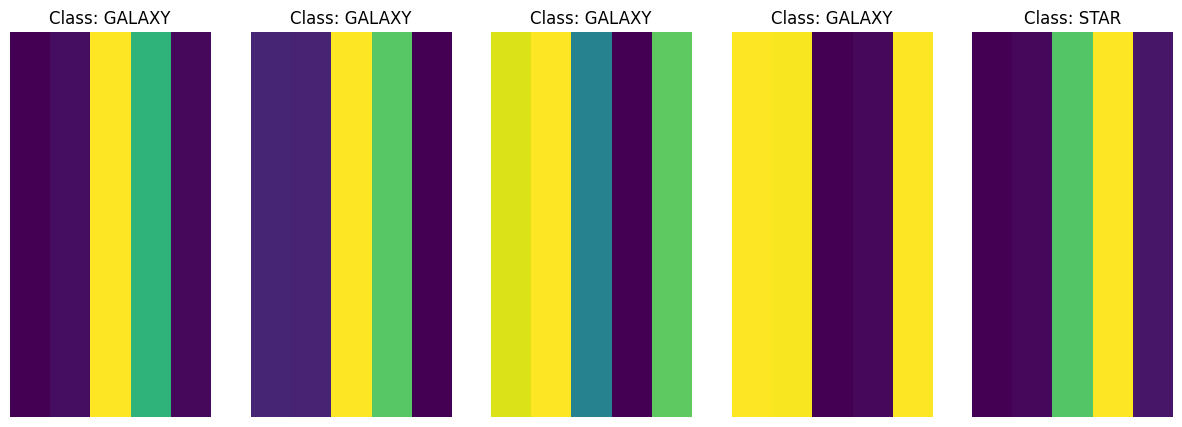

In [ ]:
import matplotlib.pyplot as plt

# feature visualization example plots

def plot_samples(X, y, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        img = X[i].reshape(1, -1)
        axes[i].imshow(img, cmap='viridis', aspect='auto')
        axes[i].set_title(f"Class: {label_encoder.inverse_transform([y[i]])[0]}")
        axes[i].axis('off')
    plt.show()

plot_samples(X_train, y_train)

# CNN model 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D

# CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train model
epochs = 20
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6656 - loss: 0.7794 - val_accuracy: 0.7352 - val_loss: 0.6442
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7514 - loss: 0.6283 - val_accuracy: 0.7928 - val_loss: 0.5410
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7755 - loss: 0.5883 - val_accuracy: 0.7657 - val_loss: 0.5751
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7852 - loss: 0.5732 - val_accuracy: 0.8019 - val_loss: 0.5184
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7942 - loss: 0.5578 - val_accuracy: 0.5429 - val_loss: 1.1336
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7977 - loss: 0.5465 - val_accuracy: 0.8173 - val_loss: 0.4891
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7990 - loss: 0.5416 - val_accuracy: 0.8223 - val_loss: 0.4869
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8005 - loss: 0.5341

In [ ]:
# train again with early stopping

from tensorflow.keras.callbacks import EarlyStopping

# train model
epochs = 50
batch_size = 32

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

# evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8101 - loss: 0.5179 - val_accuracy: 0.8267 - val_loss: 0.4672
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8110 - loss: 0.5107 - val_accuracy: 0.8278 - val_loss: 0.4711
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8087 - loss: 0.5151 - val_accuracy: 0.7024 - val_loss: 0.7776
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8110 - loss: 0.5115 - val_accuracy: 0.7077 - val_loss: 0.7299
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8098 - loss: 0.5146 - val_accuracy: 0.8311 - val_loss: 0.4574
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8120 - loss: 0.5048 - val_accuracy: 0.8281 - val_loss: 0.4498
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8136 - loss: 0.5050 - val_accuracy: 0.7703 - val_loss: 0.6427
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8114 - loss: 0.50

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


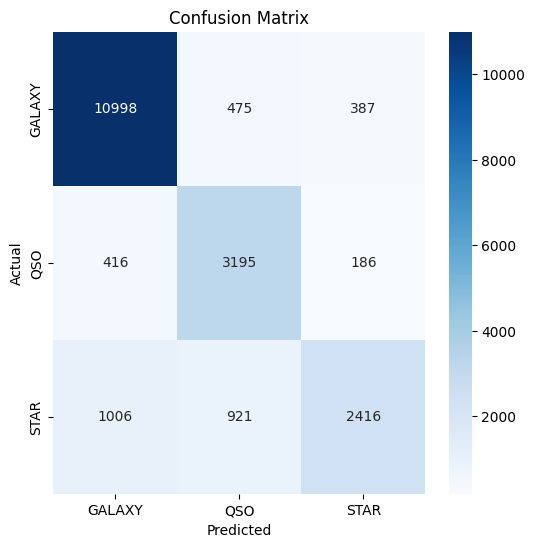

              precision    recall  f1-score   support

      GALAXY       0.89      0.93      0.91     11860
         QSO       0.70      0.84      0.76      3797
        STAR       0.81      0.56      0.66      4343

    accuracy                           0.83     20000
   macro avg       0.80      0.78      0.78     20000
weighted avg       0.83      0.83      0.82     20000



In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Galaxy classification is good, QSO and star could be improved

# CNN model 2

In [ ]:
# added Conv1D layer

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(256, kernel_size=2, activation='relu', padding='same'),  # Reduce kernel size
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train, with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 50
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

# evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7035 - loss: 0.7367 - val_accuracy: 0.7928 - val_loss: 0.5730
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7764 - loss: 0.5736 - val_accuracy: 0.8116 - val_loss: 0.5070
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7980 - loss: 0.5389 - val_accuracy: 0.7933 - val_loss: 0.5409
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8081 - loss: 0.5206 - val_accuracy: 0.8238 - val_loss: 0.4721
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8128 - loss: 0.5044 - val_accuracy: 0.8170 - val_loss: 0.4901
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8196 - loss: 0.4919 - val_accuracy: 0.8255 - val_loss: 0.4691
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8190 - loss: 0.4883 - val_accuracy: 0.8348 - val_loss: 0.4478
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8238 - loss: 0.4824 - val_a

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


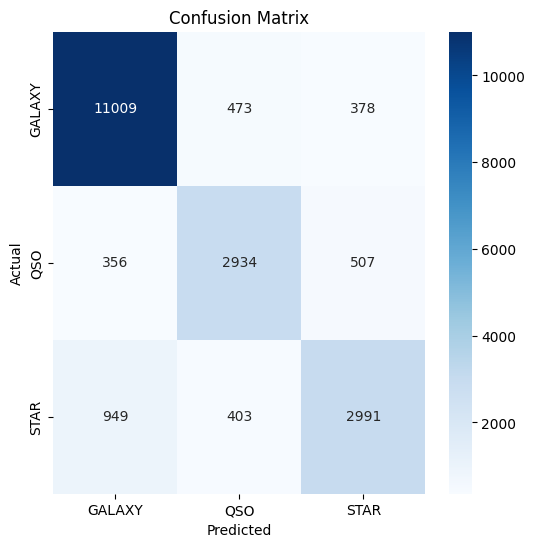

              precision    recall  f1-score   support

      GALAXY       0.89      0.93      0.91     11860
         QSO       0.77      0.77      0.77      3797
        STAR       0.77      0.69      0.73      4343

    accuracy                           0.85     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.84      0.85      0.84     20000



In [ ]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Significantly improved accuracy on QSO and star (less confusion between the 2 objects than on the previous model). Star is still often misclassified as galaxy (959 times).

# CNN model 3

In [ ]:
# use more features
features = ["u", "g", "r", "i", "z", "redshift", "alpha", "delta"]  # New features added

X = df[features].values
y = df["class"].values

In [ ]:
# encode target labels & feature normalization
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape input to fit CNN input shape (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# CNN model with new input shape
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(8, 1)),  # Correct input shape
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 output classes
])



# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train, with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 50
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

# evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8702 - loss: 0.3457 - val_accuracy: 0.9520 - val_loss: 0.1576
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9453 - loss: 0.1743 - val_accuracy: 0.9609 - val_loss: 0.1259
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9519 - loss: 0.1564 - val_accuracy: 0.9596 - val_loss: 0.1295
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9555 - loss: 0.1481 - val_accuracy: 0.9674 - val_loss: 0.1139
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9578 - loss: 0.1391 - val_accuracy: 0.9664 - val_loss: 0.1142
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9587 - loss: 0.1383 - val_accuracy: 0.9676 - val_loss: 0.1150
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9607 - loss: 0.1350 - val_accuracy: 0.9684 - val_loss: 0.1067
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9592 - loss: 0.1384 - val_ac

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


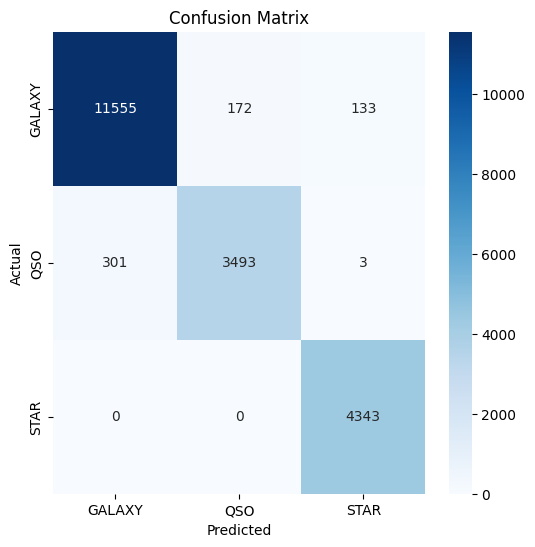

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.95      0.92      0.94      3797
        STAR       0.97      1.00      0.98      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Classifier for star very greatly improved since the addition of `redshift` and `alpha/delta` values. Since the test accuracy is nearing 97%, the model can immediately be used/deployed. However, further improvements are still possible, especially for QSO classification.